In [49]:
import numpy as np
import pickle
import copy
from helpers import helper_functions

import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
input_dir='/global/homes/a/abbatej/'
with open(input_dir+'final_data.pkl', 'rb') as f: 
    raw_data=pickle.load(f, encoding='latin1')

In [52]:
shot_indices_dictionary = helper_functions.load_obj(input_dir+'shot_indices')
train_shots = shot_indices_dictionary['train_shot_names']
val_shots = shot_indices_dictionary['val_shot_names']
train_shot_inds = shot_indices_dictionary['train_shot_indices']
val_shot_inds = shot_indices_dictionary['val_shot_indices']
train_time = np.array(helper_functions.load_obj(input_dir+'train_time'))
val_time = np.array(helper_functions.load_obj(input_dir+'val_time'))

In [15]:
shots = sorted(raw_data.keys())

In [18]:
print(raw_data[shots[2]].keys())

dict_keys(['elongation_up', 'curr', 'i_temp', 'e_temp', 'pinj', 'triangularity_up', 'curr_target', 'drsep', 'elongation_low', 'e_dens', 'Z0', 'tinj', 'i_dens', 'R0', 'zeta_in_up', 'epsilon', 'zeta_out_up', 'press', 'rotation', 'triangularity_low', 'zeta_in_low', 'gasA', 'gasB', 'q', 'time', 'R_geo', 'zeta_out_low'])


In [59]:
sig='e_temp'

pre_pca=[]
for shot in shots:
    pre_pca.extend(raw_data[shot][sig])
pre_pca=np.array(pre_pca)

In [60]:
from sklearn import preprocessing
from sklearn import decomposition

In [61]:
pre_pca_normalized=preprocessing.scale(pre_pca)

In [62]:
pre_pca_normalized.shape

(202197, 30)

In [63]:
pca=decomposition.PCA(n_components=8)
pca.fit(pre_pca_normalized)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

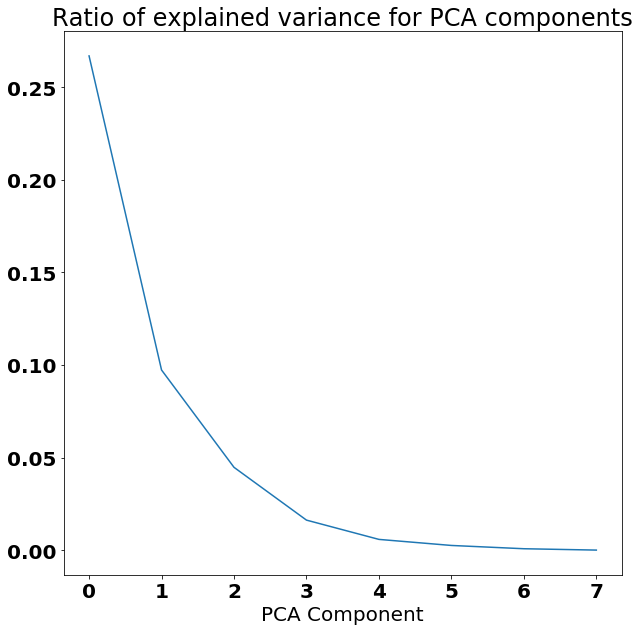

In [64]:
plt.rcParams['figure.figsize'] = [10, 10]
font={'size': 20, 'weight':'heavy'}
plt.rc('font', **font)

plt.plot(np.sum(pca.explained_variance_ratio_)-np.cumsum(pca.explained_variance_ratio_))
plt.title('Ratio of explained variance for PCA components')
plt.xlabel('PCA Component')
plt.show()

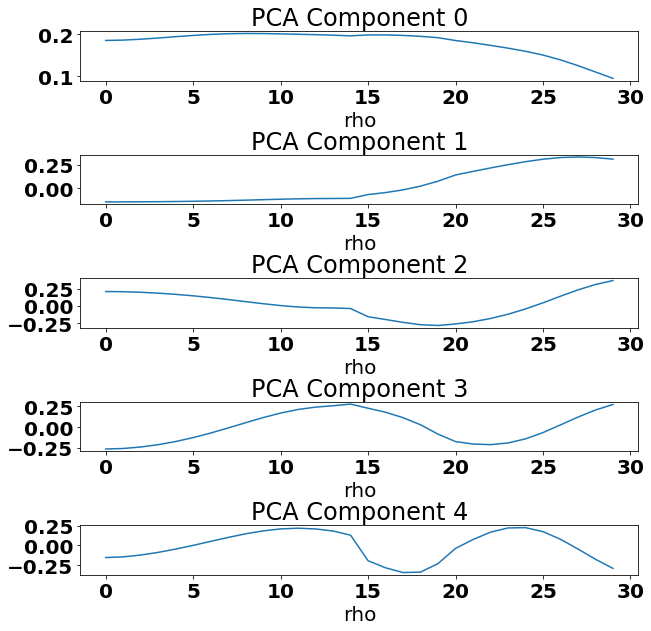

In [133]:
plt.rcParams['figure.figsize'] = [10, 10]
font={'size': 20, 'weight':'heavy'}
plt.rc('font', **font)

fig=plt.figure()
num_plots=5 #min(9,len(pca.components_))
for i in range(num_plots):
    ax=fig.add_subplot('{}{}{}'.format(num_plots,1,i+1))
    ax.plot(pca.components_[i])
    ax.set_title('PCA Component {}'.format(i))
    ax.set_xlabel('rho')
plt.xlabel('rho',fontsize=20)
plt.subplots_adjust(hspace=1.5)

In [66]:
pca_data=pca.transform(pre_pca_normalized)

In [67]:
pca_data[ind]

array([-6.55280894, -0.22634789, -0.0477323 , -0.3195766 , -0.1005525 ,
       -0.30239658, -0.34246156,  0.11872879])

Index 70442



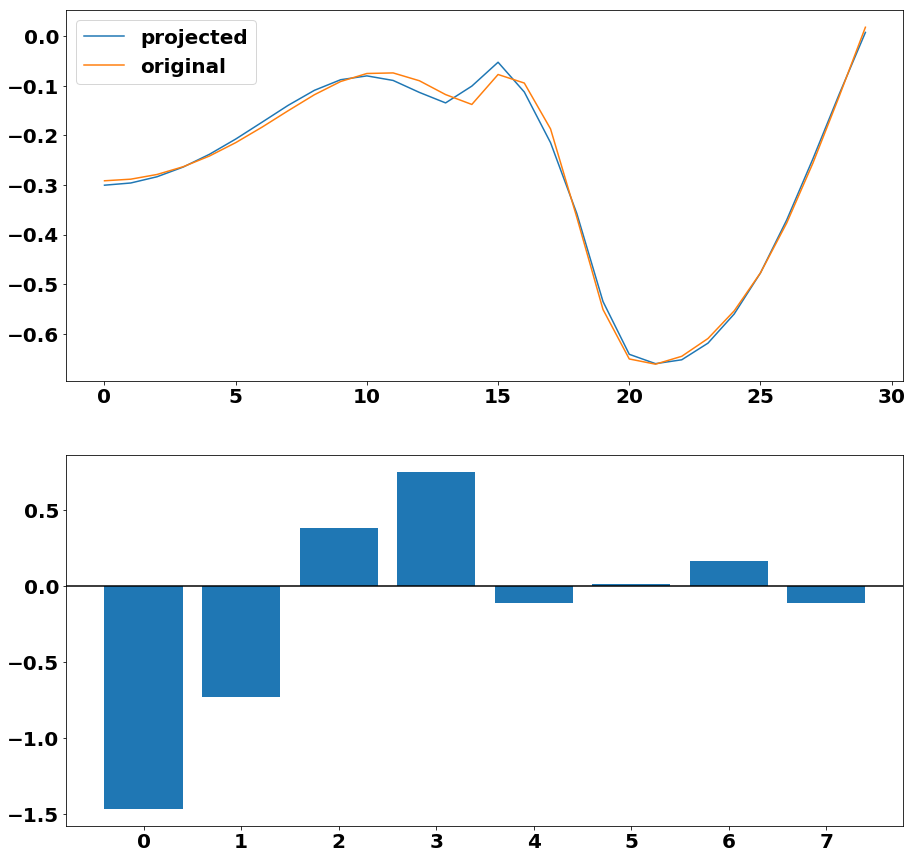

In [130]:
plt.rcParams['figure.figsize'] = [15, 15]
font={'size': 20, 'weight':'heavy'}
plt.rc('font', **font)

fig=plt.figure()
ind=np.random.choice(len(pca_data))
ax=fig.add_subplot('211')
ax.plot(pca.inverse_transform(pca_data[ind]),label='projected')
ax.plot(pre_pca_normalized[ind],label='original')
ax.legend()

ax=fig.add_subplot('212')
ax.bar([i for i  in range(len(pca_data[ind]))],pca_data[ind])
ax.axhline(0,color='k')
print('Index {}\n'.format(ind))
#print('Shot {}, timestep {}'.format(shots[ind],ind))
plt.show()